<a href="https://colab.research.google.com/github/kundajelab/locusselect/blob/master/examples/regression%20on%20200%20bp%20genome%20bins.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
import os
os.environ['CUDA_VISIBLE_DEVICES'] = "3"

In [4]:
#load dragonn tutorial utilities 
%reload_ext autoreload
%autoreload 2
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')
from numpy.random import seed
seed(1234)

In [5]:
#!pip install locusselect 

## Regression K562 DNAse model (trained genomewide), fully connected layer embeddings 

In [6]:
## generate embeddings at the -2 layer 
import locusselect 
from locusselect.embeddings import * 
from locusselect.interpret import * 
from locusselect.utils import * 
from locusselect.gapped_kmers import * 
import numpy as np


Using TensorFlow backend.


In [6]:
splits=list(range(10))
coord_prefix="/mnt/lab_data2/annashch/locusselect_examples/embedding_collapse_to_pc/all_peaks/"
model_prefix="/srv/scratch/annashch/deeplearning/encode4crispr/k562_dnase/experiments/gc_content/"
for split in splits: 
    #first, we get embeddings from the model fully connected layer 
    fc_embedding_args={"input_bed_file":coord_prefix+str(split)+".optimal_peak.narrowPeak",
                "model_hdf5":model_prefix+"DNASE.K562.regressionlabels."+str(split)+".withgc",
                "ref_fasta":"/users/annashch/male.hg19.fa",
                "center_on_summit":True,
                "center_on_bed_interval":False,
                "flank":500,
                "embedding_layer_name":"dense_2",
                "embedding_input_name":"input_1",
                "expand_dims":True,
                "threads":20,
                "output_npz_file":str(split)+".summits_FC_layer_NN_embeddings.regression.gc.npz"}
    fc_regions, fc_embeddings = compute_embeddings(fc_embedding_args)

got model architecture
loaded model weights
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            (None, 1, 1000, 4)   0                                            
__________________________________________________________________________________________________
conv2d_1 (Conv2D)               (None, 1, 1000, 300) 23100       input_1[0][0]                    
__________________________________________________________________________________________________
batch_normalization_1 (BatchNor (None, 1, 1000, 300) 1200        conv2d_1[0][0]                   
__________________________________________________________________________________________________
activation_1 (Activation)       (None, 1, 1000, 300) 0           batch_normalization_1[0][0]      
_________________________________________________________________

1/1 [==============================] - 5s 5s/step
created data generator from 1000
1/1 [==============================] - 5s 5s/step
created data generator from 2000
1/1 [==============================] - 5s 5s/step
created data generator from 3000
1/1 [==============================] - 5s 5s/step
created data generator from 4000
1/1 [==============================] - 5s 5s/step
created data generator from 5000
1/1 [==============================] - 5s 5s/step
created data generator from 6000
1/1 [==============================] - 4s 4s/step
created data generator from 7000
1/1 [==============================] - 5s 5s/step
created data generator from 8000
1/1 [==============================] - 4s 4s/step
created data generator from 9000
1/1 [==============================] - 5s 5s/step
created data generator from 10000
1/1 [==============================] - 5s 5s/step
created data generator from 11000
1/1 [==============================] - 5s 5s/step
created data generator from 12000
1

1/1 [==============================] - 5s 5s/step
created data generator from 1000
1/1 [==============================] - 5s 5s/step
created data generator from 2000
1/1 [==============================] - 5s 5s/step
created data generator from 3000
1/1 [==============================] - 5s 5s/step
created data generator from 4000
1/1 [==============================] - 5s 5s/step
created data generator from 5000
1/1 [==============================] - 5s 5s/step
created data generator from 6000
1/1 [==============================] - 5s 5s/step
created data generator from 7000
1/1 [==============================] - 5s 5s/step
created data generator from 8000
1/1 [==============================] - 5s 5s/step
created data generator from 9000
1/1 [==============================] - 5s 5s/step
created data generator from 10000
1/1 [==============================] - 5s 5s/step
created data generator from 11000
1/1 [==============================] - 5s 5s/step
created data generator from 12000
1

1/1 [==============================] - 5s 5s/step
created data generator from 1000
1/1 [==============================] - 10s 10s/step
created data generator from 2000
1/1 [==============================] - 5s 5s/step
created data generator from 3000
1/1 [==============================] - 5s 5s/step
created data generator from 4000
1/1 [==============================] - 5s 5s/step
created data generator from 5000
1/1 [==============================] - 5s 5s/step
created data generator from 6000
1/1 [==============================] - 5s 5s/step
created data generator from 7000
1/1 [==============================] - 5s 5s/step
created data generator from 8000
1/1 [==============================] - 5s 5s/step
created data generator from 9000
1/1 [==============================] - 5s 5s/step
created data generator from 10000
1/1 [==============================] - 5s 5s/step
created data generator from 11000
1/1 [==============================] - 5s 5s/step
created data generator from 12000

1/1 [==============================] - 5s 5s/step
created data generator from 1000
1/1 [==============================] - 5s 5s/step
created data generator from 2000
1/1 [==============================] - 5s 5s/step
created data generator from 3000
1/1 [==============================] - 5s 5s/step
created data generator from 4000
1/1 [==============================] - 5s 5s/step
created data generator from 5000
1/1 [==============================] - 5s 5s/step
created data generator from 6000
1/1 [==============================] - 5s 5s/step
created data generator from 7000
1/1 [==============================] - 5s 5s/step
created data generator from 8000
1/1 [==============================] - 5s 5s/step
created data generator from 9000
1/1 [==============================] - 5s 5s/step
created data generator from 10000
1/1 [==============================] - 5s 5s/step
created data generator from 11000
1/1 [==============================] - 5s 5s/step
created data generator from 12000
1

created data generator from 0
1/1 [==============================] - 5s 5s/step
created data generator from 1000
1/1 [==============================] - 6s 6s/step
created data generator from 2000
1/1 [==============================] - 6s 6s/step
created data generator from 3000
1/1 [==============================] - 5s 5s/step
created data generator from 4000
1/1 [==============================] - 6s 6s/step
created data generator from 5000
1/1 [==============================] - 6s 6s/step
created data generator from 6000
1/1 [==============================] - 5s 5s/step
created data generator from 7000
1/1 [==============================] - 5s 5s/step
created data generator from 8000
1/1 [==============================] - 5s 5s/step
created data generator from 9000
1/1 [==============================] - 6s 6s/step
created data generator from 10000
1/1 [==============================] - 5s 5s/step
created data generator from 11000
1/1 [==============================] - 5s 5s/step
creat

1/1 [==============================] - 6s 6s/step
created data generator from 1000
1/1 [==============================] - 7s 7s/step
created data generator from 2000
1/1 [==============================] - 5s 5s/step
created data generator from 3000
1/1 [==============================] - 6s 6s/step
created data generator from 4000
1/1 [==============================] - 6s 6s/step
created data generator from 5000
1/1 [==============================] - 5s 5s/step
created data generator from 6000
1/1 [==============================] - 5s 5s/step
created data generator from 7000
1/1 [==============================] - 5s 5s/step
created data generator from 8000
1/1 [==============================] - 6s 6s/step
created data generator from 9000
1/1 [==============================] - 5s 5s/step
created data generator from 10000
1/1 [==============================] - 5s 5s/step
created data generator from 11000
1/1 [==============================] - 6s 6s/step
created data generator from 12000
1

1/1 [==============================] - 6s 6s/step
created data generator from 1000
1/1 [==============================] - 6s 6s/step
created data generator from 2000
1/1 [==============================] - 6s 6s/step
created data generator from 3000
1/1 [==============================] - 5s 5s/step
created data generator from 4000
1/1 [==============================] - 6s 6s/step
created data generator from 5000
1/1 [==============================] - 6s 6s/step
created data generator from 6000
1/1 [==============================] - 11s 11s/step
created data generator from 7000
1/1 [==============================] - 6s 6s/step
created data generator from 8000
1/1 [==============================] - 6s 6s/step
created data generator from 9000
1/1 [==============================] - 6s 6s/step
created data generator from 10000
1/1 [==============================] - 6s 6s/step
created data generator from 11000
1/1 [==============================] - 5s 5s/step
created data generator from 12000

1/1 [==============================] - 8s 8s/step
created data generator from 1000
1/1 [==============================] - 7s 7s/step
created data generator from 2000
1/1 [==============================] - 6s 6s/step
created data generator from 3000
1/1 [==============================] - 8s 8s/step
created data generator from 4000
1/1 [==============================] - 6s 6s/step
created data generator from 5000
1/1 [==============================] - 7s 7s/step
created data generator from 6000
1/1 [==============================] - 7s 7s/step
created data generator from 7000
1/1 [==============================] - 7s 7s/step
created data generator from 8000
1/1 [==============================] - 7s 7s/step
created data generator from 9000
1/1 [==============================] - 7s 7s/step
created data generator from 10000
1/1 [==============================] - 6s 6s/step
created data generator from 11000
1/1 [==============================] - 7s 7s/step
created data generator from 12000
1

1/1 [==============================] - 7s 7s/step
created data generator from 1000
1/1 [==============================] - 7s 7s/step
created data generator from 2000
1/1 [==============================] - 7s 7s/step
created data generator from 3000
1/1 [==============================] - 7s 7s/step
created data generator from 4000
1/1 [==============================] - 7s 7s/step
created data generator from 5000
1/1 [==============================] - 7s 7s/step
created data generator from 6000
1/1 [==============================] - 8s 8s/step
created data generator from 7000
1/1 [==============================] - 6s 6s/step
created data generator from 8000
1/1 [==============================] - 6s 6s/step
created data generator from 9000
1/1 [==============================] - 7s 7s/step
created data generator from 10000
1/1 [==============================] - 6s 6s/step
created data generator from 11000
1/1 [==============================] - 7s 7s/step
created data generator from 12000
1

1/1 [==============================] - 8s 8s/step
created data generator from 1000
1/1 [==============================] - 6s 6s/step
created data generator from 2000
1/1 [==============================] - 6s 6s/step
created data generator from 3000
1/1 [==============================] - 7s 7s/step
created data generator from 4000
1/1 [==============================] - 7s 7s/step
created data generator from 5000
1/1 [==============================] - 7s 7s/step
created data generator from 6000
1/1 [==============================] - 7s 7s/step
created data generator from 7000
1/1 [==============================] - 8s 8s/step
created data generator from 8000
1/1 [==============================] - 7s 7s/step
created data generator from 9000
1/1 [==============================] - 7s 7s/step
created data generator from 10000
1/1 [==============================] - 7s 7s/step
created data generator from 11000
1/1 [==============================] - 7s 7s/step
created data generator from 12000
1

In [19]:
#combine the loci embeddings into a single data frame 
all_embeddings=None
all_bed_entries=None
locus_to_pos={}
locus_prefix="/mnt/lab_data2/annashch/locusselect_examples/gc_corrected/regression.1kb.FClayer.embeddings.gc.corrected/"
locus_suffix="_FC_layer_NN_embeddings.regression.gc.npz"
loci=["BCL11A","HBA2","HBE1","LMO2","MYC","RBM38"]
last_index=0
for locus in loci: 
    cur_embedding_data=np.load(locus_prefix+locus+locus_suffix,allow_pickle=True)
    cur_bed_entries=cur_embedding_data['bed_entries']
    cur_embeddings=cur_embedding_data['embeddings']
    if all_embeddings is None: 
        all_embeddings=cur_embeddings 
        all_bed_entries=cur_bed_entries
    else: 
        all_embeddings=np.concatenate((all_embeddings,cur_embeddings),axis=0)
        all_bed_entries=np.concatenate((all_bed_entries,cur_bed_entries),axis=0)
    start_pos=last_index 
    end_pos=last_index+cur_embeddings.shape[0]
    last_index=end_pos 
    locus_to_pos[locus]=[start_pos,end_pos]

In [20]:
all_embeddings.shape

(44657, 1000)

In [21]:
locus_to_pos

{'BCL11A': [0, 8001],
 'HBA2': [8001, 12653],
 'HBE1': [12653, 20654],
 'LMO2': [20654, 28655],
 'MYC': [28655, 36656],
 'RBM38': [36656, 44657]}

In [23]:
#augment with all peak embeddings 
splits=list(range(10))

for split in splits: 
    cur_embeddings_data=np.load(str(split)+".summits_FC_layer_NN_embeddings.regression.gc.npz",allow_pickle=True)
    cur_bed_entries=cur_embedding_data['bed_entries']
    cur_embeddings=cur_embedding_data['embeddings']
    all_embeddings=np.concatenate((all_embeddings,cur_embeddings),axis=0)
    all_bed_entries=np.concatenate((all_bed_entries,cur_bed_entries),axis=0)

In [25]:
all_bed_entries.shape

(124667,)

In [26]:
all_embeddings.shape

(124667, 1000)

In [27]:
# run PCA on the embeddings 
# Dimension reduction and clustering libraries
import umap
import hdbscan
import sklearn.cluster as cluster
from sklearn.metrics import adjusted_rand_score, adjusted_mutual_info_score


/users/annashch/miniconda3/lib/python3.7/site-packages/sklearn/externals/six.py:31: DeprecationWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", DeprecationWarning)
/users/annashch/miniconda3/lib/python3.7/site-packages/sklearn/externals/joblib/__init__.py:15: DeprecationWarning: sklearn.externals.joblib is deprecated in 0.21 and will be removed in 0.23. Please import this functionality directly from joblib, which can be installed with: pip install joblib. If this warning is raised when loading pickled models, you may need to re-serialize those models with scikit-learn 0.21+.
  warnings.warn(msg, category=DeprecationWarning)


In [30]:
from sklearn.decomposition import PCA 
  
pca = PCA(n_components = 1000) 
  
pca_res = pca.fit_transform(all_embeddings)   
explained_variance = pca.explained_variance_ratio_ # verify that the PCA embeddings have same UMAP projection as original embeddings. 

In [31]:
explained_variance[0:10]
np.cumsum(explained_variance)

array([0.47522807, 0.58435658, 0.67918848, 0.73106548, 0.77766217,
       0.8128353 , 0.8444886 , 0.86954655, 0.88760376, 0.90110228,
       0.91233571, 0.9195554 , 0.9256762 , 0.93080472, 0.93570506,
       0.94009671, 0.94413858, 0.94802862, 0.95129762, 0.95425269,
       0.95696166, 0.95942756, 0.96167611, 0.96383009, 0.96587661,
       0.96772883, 0.96933912, 0.97080586, 0.97223842, 0.97345663,
       0.97461784, 0.97562442, 0.97662635, 0.9775099 , 0.97837252,
       0.97914889, 0.97988947, 0.98061964, 0.98126811, 0.98188611,
       0.9824668 , 0.98298593, 0.98347771, 0.98393633, 0.98438647,
       0.98480601, 0.98518633, 0.98556099, 0.98591304, 0.98624612,
       0.9865762 , 0.98688494, 0.98717545, 0.98746158, 0.9877361 ,
       0.98798361, 0.98822424, 0.988459  , 0.98868344, 0.98890023,
       0.98911132, 0.98931786, 0.98951439, 0.98970736, 0.98989064,
       0.99006531, 0.99023663, 0.99040191, 0.9905643 , 0.99071547,
       0.9908626 , 0.99100854, 0.99114904, 0.99128821, 0.99142

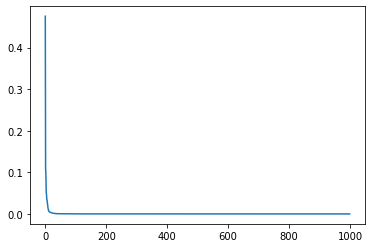

In [32]:
from matplotlib import pyplot as plt
plt.plot(explained_variance)

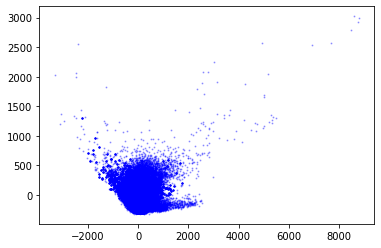

In [33]:
plt.plot(pca_res[:,0],pca_res[:,1],'bo',markersize=1,alpha=0.3)


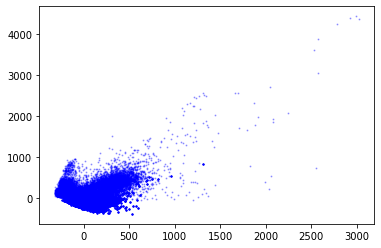

In [34]:
plt.plot(pca_res[:,1],pca_res[:,2],'bo',markersize=1,alpha=0.3)


In [37]:
from plotnine import * 

## We subset to 50 pc's 

(8001, 51)


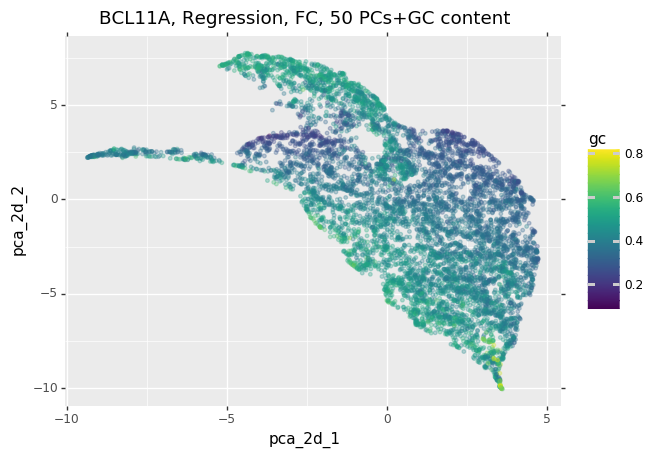

<ggplot: (8726868180323)>


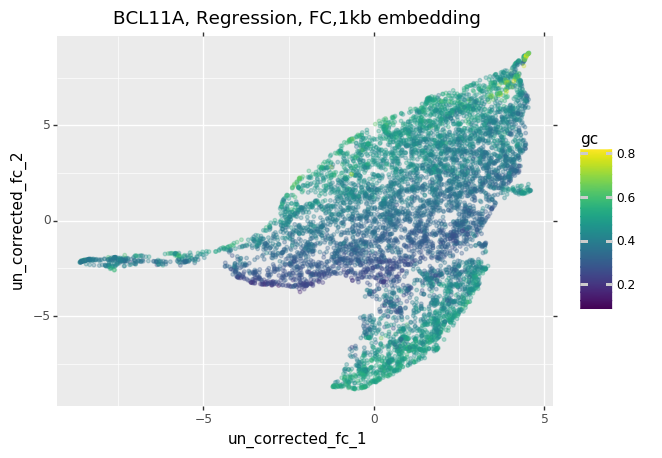

<ggplot: (-9223363309986465136)>
(4652, 51)


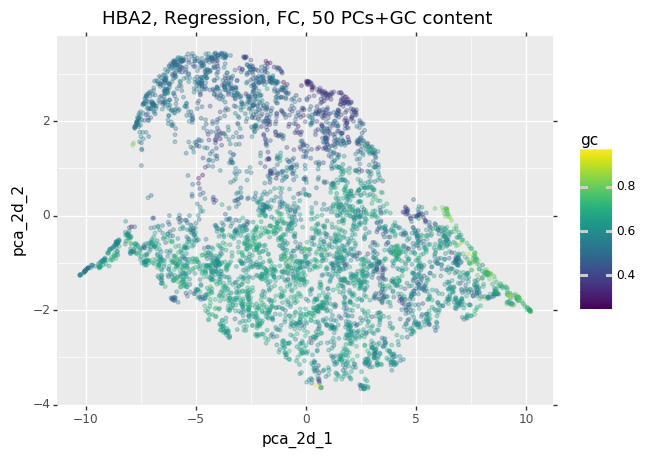

<ggplot: (8726867488555)>


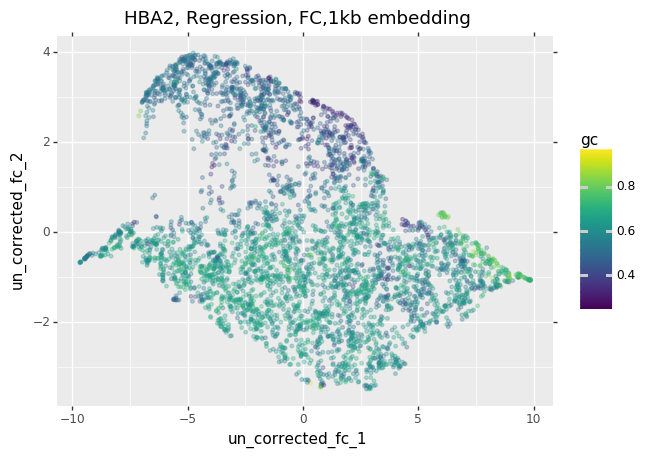

<ggplot: (-9223363309728598980)>
(8001, 51)


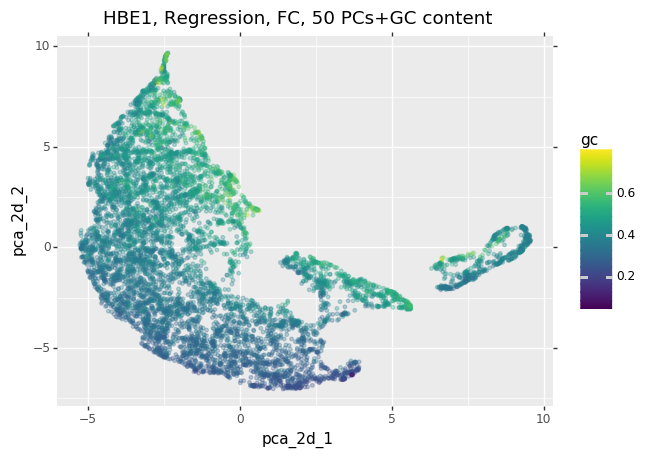

<ggplot: (8726861603048)>


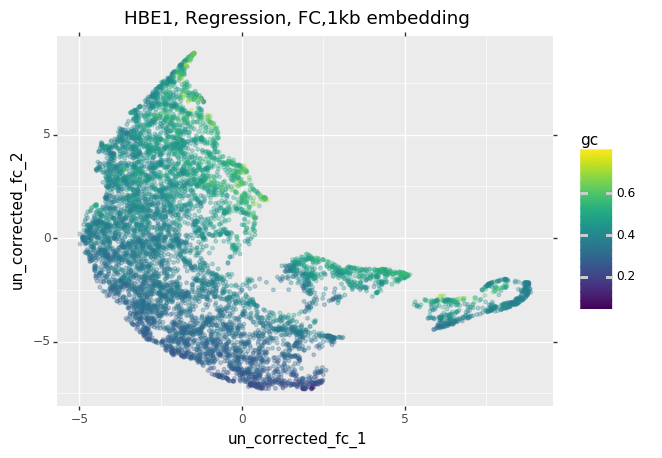

<ggplot: (-9223363309728876540)>
(8001, 51)


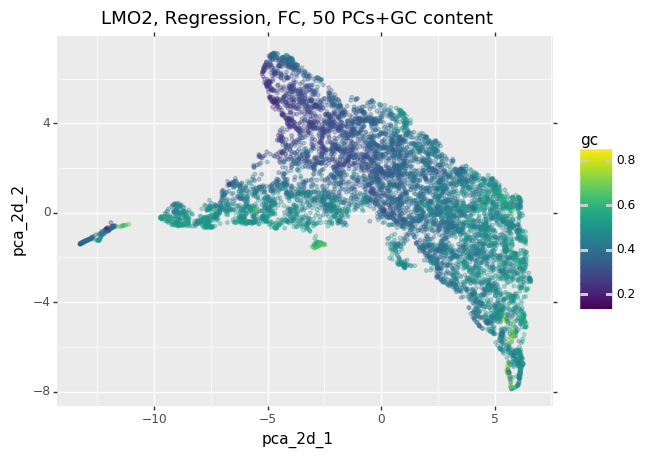

<ggplot: (8726861589238)>


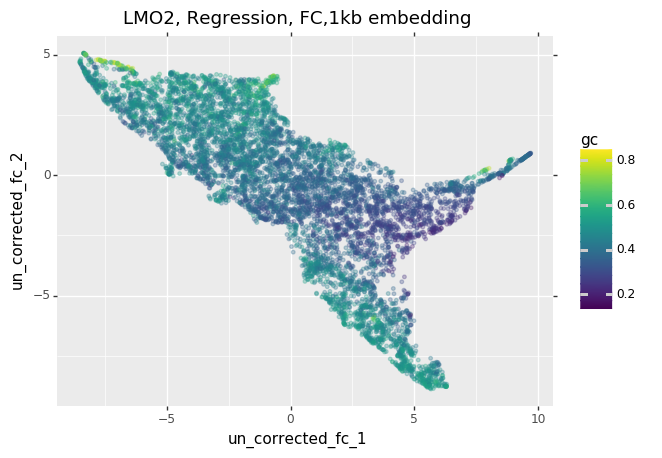

<ggplot: (-9223363309986590867)>
(8001, 51)


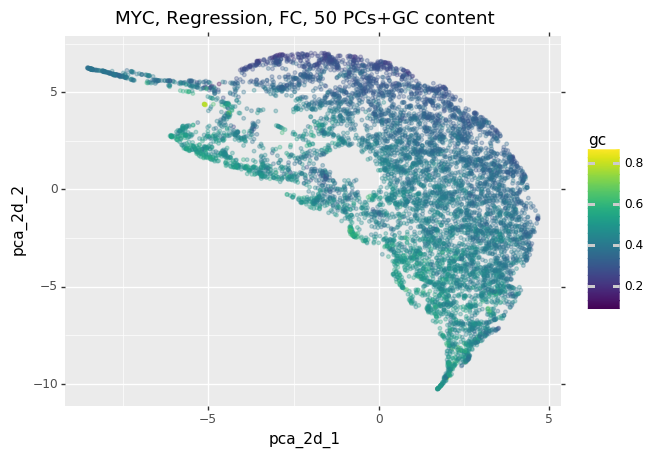

<ggplot: (-9223363309734743271)>


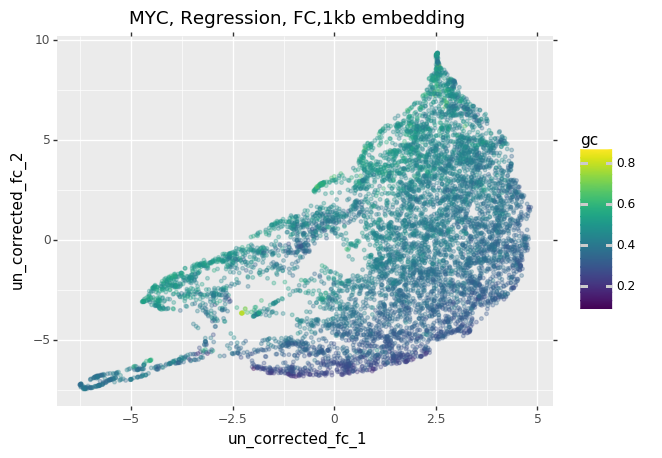

<ggplot: (-9223363309993165743)>
(8001, 51)


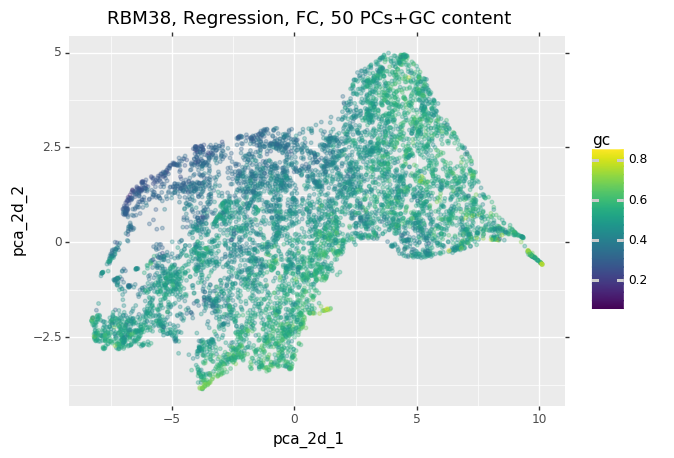

<ggplot: (-9223363309986489407)>


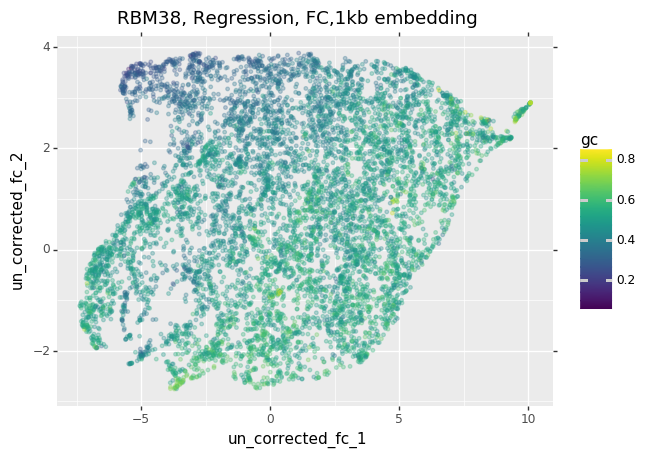

<ggplot: (8727126061425)>


In [42]:
for locus in loci: 
    gc_content=open("../compute_gc/gc."+locus+".bed",'r').read().strip().split('\n')
    gc_vals=np.expand_dims(np.asarray([float(i.split('\t')[-1]) for i in gc_content]),axis=1)
    #add gc column to embedding 
    pca_with_gc=np.concatenate((pca_res[locus_to_pos[locus][0]:locus_to_pos[locus][1],0:50],gc_vals),axis=1)
    coords=all_bed_entries[locus_to_pos[locus][0]:locus_to_pos[locus][1]]
    print(pca_with_gc.shape)
    #save 
    np.savez_compressed(locus+"_FC_layer_NN_embeddings.regression.gc.top50pcs.npz",bed_entries=coords,embeddings=pca_with_gc)
    pca_2d = umap.UMAP(random_state=42).fit_transform(pca_with_gc)
    df_pca=pd.DataFrame.from_dict({'pca_2d_1':pca_2d[:,0],
                              'pca_2d_2':pca_2d[:,1],
                              'gc':gc_vals.squeeze()})
    print((ggplot(df_pca,aes(x='pca_2d_1', y='pca_2d_2',color='gc'))+
       geom_point(size=1,alpha=0.3)+
       ggtitle(locus+", Regression, FC, 50 PCs+GC content")))
    un_corrected_fc_embeddings_2d = umap.UMAP(random_state=42).fit_transform(all_embeddings[locus_to_pos[locus][0]:locus_to_pos[locus][1]])
    df_fc=pd.DataFrame.from_dict({'un_corrected_fc_1':un_corrected_fc_embeddings_2d[:,0],
                              'un_corrected_fc_2':un_corrected_fc_embeddings_2d[:,1],
                              'gc':gc_vals.squeeze()})
    print((ggplot(df_fc,aes(x='un_corrected_fc_1', y='un_corrected_fc_2',color='gc'))+
       geom_point(size=1,alpha=0.3)+
       ggtitle(locus+", Regression, FC,1kb embedding")))
